### **Quantum Machine Learning with Qiskit**


#### **Python & Qiskit Setup**

Our objective in this course is doing machine learning through quantum computing. To achieve this a series of exercises will be solved by quantum circuits. All circuits will be executed through a local simulator. A separate notebook explains how to submit circuits to be runned at IBM Quantum Computers. Besides `qiskit`, it will be heavly used `numpy`, matplotlib's `pyplot`, `pandas`, and `scikit-learn`. The option `-q` installs them silently.

In [ ]:
# Setup básico
!pip install qiskit -q
!pip install qiskit[visualization] -q
import qiskit as qk

!pip install qiskit-aer -q
import qiskit_aer as qk_aer

import numpy as np
np.set_printoptions(precision=3, suppress=True)

from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import sklearn as sk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 15.3 MB/s eta 0:00:00


#### **Qubits basics**

##### **Ex.1: Creating a qubit**

In this example we will create a qubit $|\psi_0\rangle$, put it in the state $|0\rangle$ and measure it.

As you may have noticed, we are talking about quantitative models, mathematical representations of a reality. In our representation, the object $|\psi_0\rangle$ that we use to describe our qubit is called a *vector*. The state $|0\rangle$ is therefore a vector and we say $ |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$. Likewise, the state $|1\rangle$ is also a vector, represented by $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$.

A Qubit (initialized in the state |0> plus one classical bit


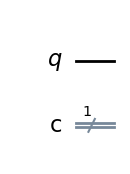

A qubit forced initialized in the state |0>


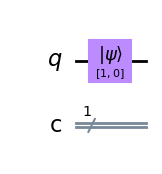

A qubit forced initialized in |0> and a measurement


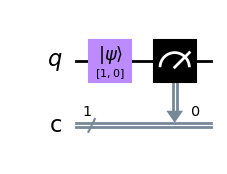

In [ ]:
# Remember that qiskit has to be already installed in the Python environment.
# Otherwise the import command will fail
import qiskit as qk

print("A Qubit (initialized in the state |0> plus one classical bit")
qr = qk.QuantumRegister(1,'q')
cr = qk.ClassicalRegister(1,'c')
qc = qk.QuantumCircuit(qr, cr)
display(qc.draw('mpl', style = 'clifford', scale = 1))

print("A qubit forced initialized in the state |0>")
qc.initialize([1,0])
display(qc.draw('mpl', style = 'clifford', scale = 1))

print("A qubit forced initialized in |0> and a measurement")
qc.measure([0],[0])
display(qc.draw('mpl', style = 'clifford'))

Quantum Computing is a probabilistic computation method, similar to a Monte Carlo simulation. The samples are qubit states that the circuit "decides" to show us whenever we measure it. To do this we must chose a *backend* and a *simulator* to run the circuit.  

The Python code presented below, shows the simulators available in the `Aer` backend. In this exercise and others exercises we will use the `aer_simulator`.  

In [ ]:
import qiskit as qk
import qiskit_aer as qk_aer

# A list of possible measurements.
qk_aer.Aer.backends()[7:]

[AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

Now we tell Qiskit to translate the circuit `qc` to be executed in the backend `backend`. This process is called `transpile` and in the end we have a new circuit ready to be executed. It is similar to the process of compiling a source code and get an .exe as a result. After that, the transpiled circuit is runned on the backend itself. In the execution (job) below, the transpiled circuit `qc_exe` is runned 1000 times in `backend` (a `aer_simulator`). The results are the state $|0\rangle$ 1000 times.

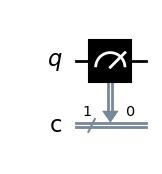

{'0': 1000}

In [ ]:
import qiskit as qk

# To simplify the code let's use the function QuantumCircuit(n,m)
#  which creates n Qubits and m Classical Registers at once
qc = qk.QuantumCircuit(1,1)

# Also, it is not necessary to force initialize the qubits. Whenever
#  they are created, they start from |0>.
qc.measure([0],[0])
display(qc.draw('mpl', style = 'clifford', scale=1))

# Let's choose a Aer backend with the aer_simulator
backend = qk_aer.Aer.get_backend('aer_simulator')

# Next we "transpile" the circuit through the backend chosen
qc_exe = qk.transpile(qc, backend)

# And execute the circuit qc in the simulator backend
#  getting as final result the counts from 1.000 measures
#  of the qubit state
result = backend.run(qc_exe, shots=1000).result().get_counts()
result

The graphic below presents an histogram of the results's probabilities

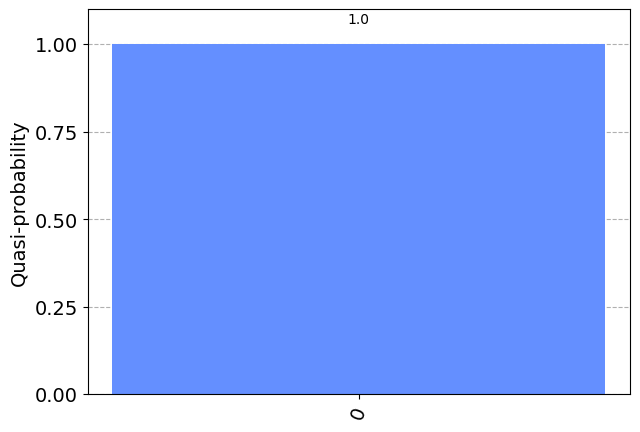

In [ ]:
import qiskit as qk
import qiskit_aer as qk_aer

backend = qk_aer.Aer.get_backend('aer_simulator')
qc_exe = qk.transpile(qc, backend)
result = backend.run(qc, shots=1000).result().get_counts()
qk.visualization.plot_distribution(result)

To simplify our process of presenting results, let's create a function that will:

- receive a circuit
- chose a backend and a simulator
- transpile and run the circuit
- present the circuit and results countint and histogram.

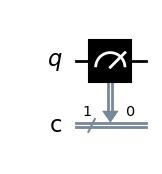

{'0': 1000}


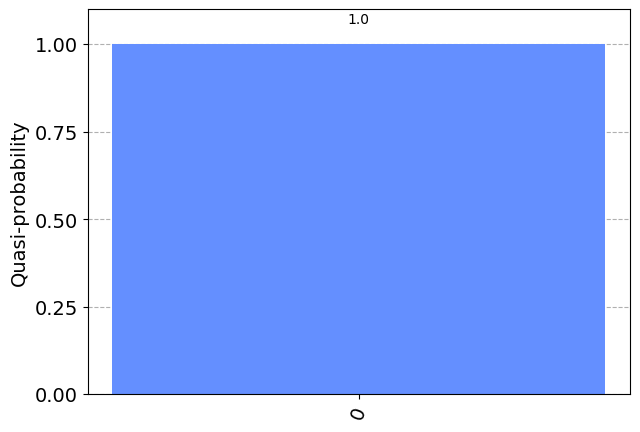

In [ ]:
def show_histogram(qc,shots=1000):
  display(qc.draw('mpl', style = 'clifford', scale=1))
  backend = qk_aer.Aer.get_backend('aer_simulator')
  qc_exe = qk.transpile(qc, backend)
  result = backend.run(qc, shots=1000).result().get_counts()
  print(result)
  grafico = qk.visualization.plot_distribution(result)
  display(grafico)
  return([result, grafico])

show_histogram(qc);

##### **Ex.2: Create a circuit which receives a qubit in the state $|0\rangle$ and puts it in the state $|1\rangle$.**

Although the result of a measurement in a qubit is always $|0\rangle$ or $|1\rangle$ it is possible to modify the qubit state (up to a point) until it is measured. The possible results of a measurement in a qubit are called the qubit's *base states*. When the qubit is "left to its own devices" (in other words undisturbed) it is said to be in a state called *superposition* of its base states.

Remember that the states $|0\rangle$ and $|1\rangle$ can also be represented by the matrices $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$? What we want in this exercise is a way of putting a matrix $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ in a circuit and getting back the matrix $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$. From a purely mathematical perspective what we want is another matrix (let's call it $X$) which when multiplied by $|0\rangle$ gives as a result $|1\rangle$. In other words $|1\rangle = X.|0\rangle$. Which matrix is that?

$ X = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $. In fact, $X.|0\rangle = |1\rangle$ because: $\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix}
1 & 0 \\ 0 & 1 \end{bmatrix}.\begin{bmatrix} 1 \\ 0 \end{bmatrix}  $. From a quantum circuit perspective a matrix that operates in a qubit state and modifies it is called a *gate*. The $X$ matrix depicted here represents the so called *NOT* gate. Let's first represent all the matrices operations described here in Python using the `numpy` library. After that let's do the same using a quantum circuit model.

In [ ]:
import numpy as np
v0 = np.array([[1],[0]]);v0

array([[1],
       [0]])

In [ ]:
v1 = np.array([[0],[1]]); v1

array([[0],
       [1]])

In [ ]:
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
X.dot(v0)

array([[0],
       [1]])

In [ ]:
X.dot(v1)

array([[1],
       [0]])

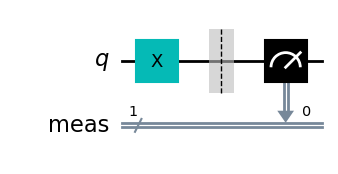

{'1': 1000}


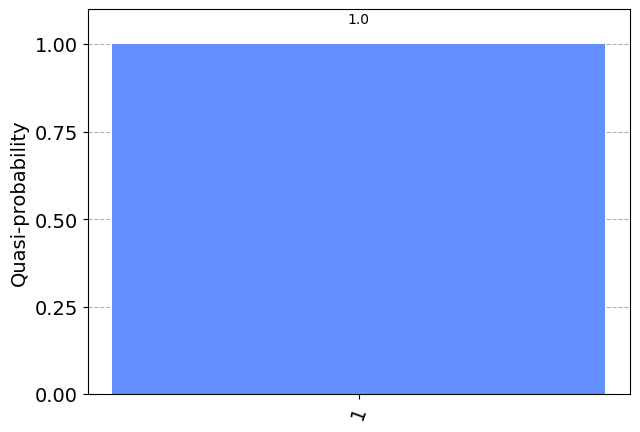

In [ ]:
import qiskit as qk
# Notice the compact way of creating a circuit. We indicate just the number of
#  qubits and in the end we make a measurement of all qubits with measure_all()
# Also, when using measure_all(), Qiskit inserts a barrier between the Qubits
#  and the measurements (classical bits)
qc = qk.QuantumCircuit(1)
qc.x(0)
qc.measure_all()
show_histogram(qc);

Note that the $X$ operator if applied twice in a qubit will reverse the result again. From a matrix perspective this means that $X.X.|0\rangle = |0\rangle$ or $X^2.|0\rangle = |0\rangle$. In other words $X^2 = I$ where $I$ is the so called Identity Matrix. You can think of it as the equivalent in matrices of the number 1. Below this operation is shown first using `numpy` and then using `qiskit`.   

In [ ]:
import numpy as np
# Notice that we are creating the v0 matrix using the transpose operation
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [ ]:
# Here it is created again de X matrix
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
# Multiplying v0 by the X matrix twice you get again v0
X.dot(X).dot(v0)

array([[1],
       [0]])

In [ ]:
# Multiplying the X matrix by itself you get the Identity matrix
X.dot(X)

array([[1, 0],
       [0, 1]])

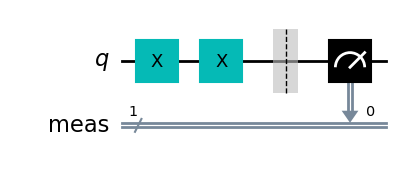

{'0': 1000}


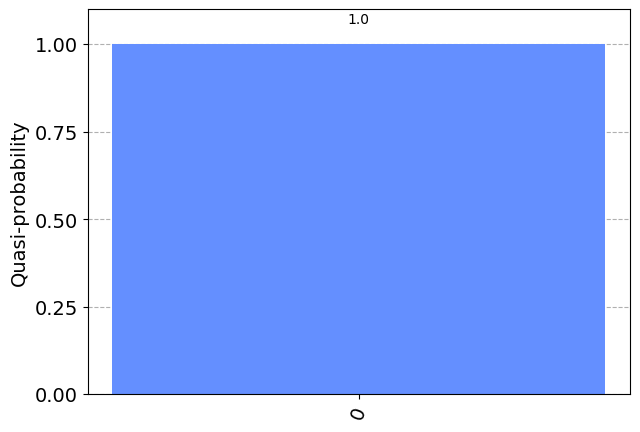

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(1)
qc.x(0)
qc.x(0)
qc.measure_all()
show_histogram(qc);

##### **Ex.3: Initialize a qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ and present the results of 1.000 measures.**

Remember that a qubit when you're not looking at it, is like a coin that is still spinning. The state that this qubit is, can be represented by $|\psi\rangle = a|0\rangle + b|1\rangle$, with $|a|^2+|b|^2=1$. $a$ and $b$ are the probabilities amplitudes of each base state that form the total $|\psi\rangle$ state. $|a|^2$ and $|b|^2$ are the probabilities of measuring the associated base states $|0\rangle$ and $|1\rangle$ respectively. Since $a^2 = \left\vert\frac{1}{\sqrt{2}}\right\vert^2 = \frac{1}{2}$ the probability of measuring $|0\rangle$ is 50% (the same for $|1\rangle$). Therefore in this example, if we execute 10.000 measures we expect to see aproximately 5.000 measures of the $|0\rangle$ and 5.000 measures of the $|1\rangle$ base states respectively. The circuit below depicts this experiment.

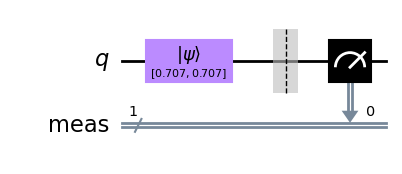

{'1': 507, '0': 493}


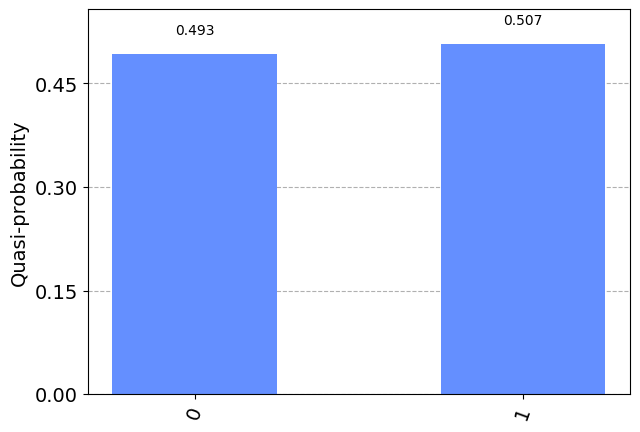

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(1)
qc.initialize([2**-0.5,2**-0.5],0)
qc.measure_all()
show_histogram(qc);

The process of initializing the qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ could also have been acomplished using another gate. This gate would receive a qubit in the state $|0\rangle$ and output the state $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$. Which gate is that?

This is the Hadamard gate. Call it $H$. $H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\ 1 & -1 \end{bmatrix}$. Indeed, if we calculate $H.|0\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}.\begin{bmatrix} 1 \\ 0  \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$.

Let's deploy this operation first in numpy ...

In [ ]:
import numpy as np
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2); H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
H.dot(v0)

array([[0.707],
       [0.707]])

... and then through a quantum circuit. As you can see, the histogram of measurements is the same.

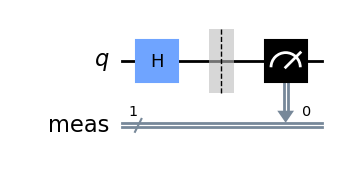

{'1': 493, '0': 507}


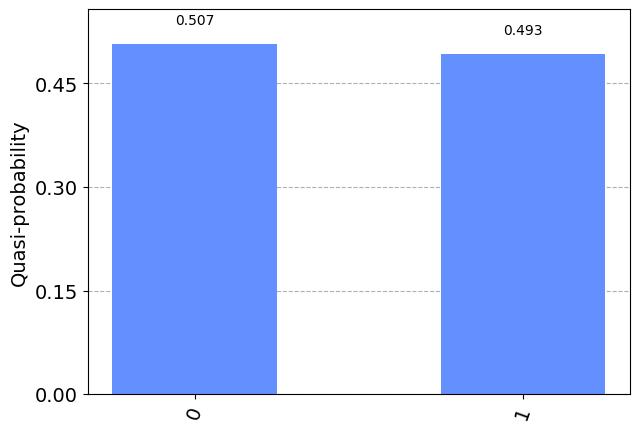

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(1)
qc.h(0)
qc.measure_all()
show_histogram(qc);

##### **Ex.4: Initialize a qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$ and present the results of 1.000 measures.**

Remember when we defined our qubit's superposition state and said that the probabilities amplitudes $a$ and $b$ could also be any complex number? What about if b is a negative number, like -1? What would we measure if the qubit state was defined by $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$? In terms of base states counting in 10.000 measures the answer is: the same result, because $\left\vert -\frac{1}{\sqrt{2}} \right\vert^2 = \frac{1}{2}$. Let's create a quantum circuit and check this result.

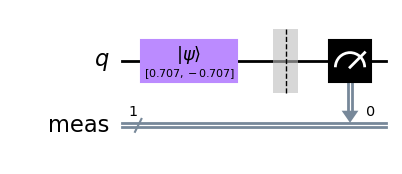

{'0': 507, '1': 493}


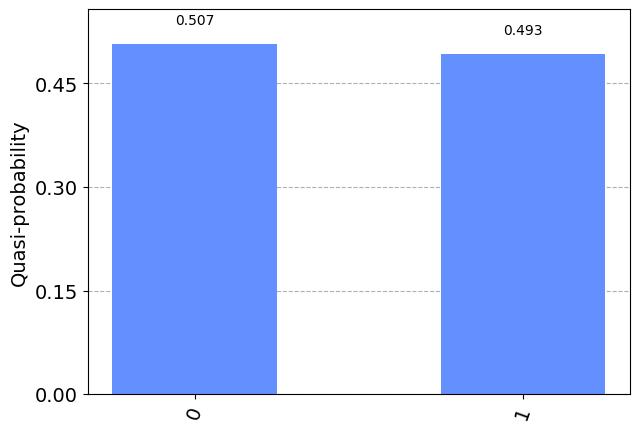

[{'0': 507, '1': 493}, <Figure size 700x500 with 1 Axes>]

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(1)
qc.initialize([2**-0.5,-(2**-0.5)],0)
qc.measure_all()
show_histogram(qc)

Now let's make another experiment. We start with the qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$. We then pass it through an H gate and them we measure it. What's going to be the result? Let's create the new circuit, get the result and try understanding it.

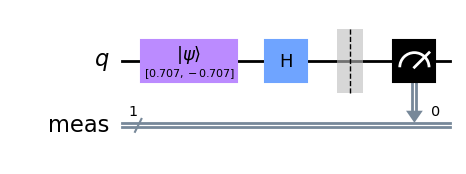

{'1': 1000}


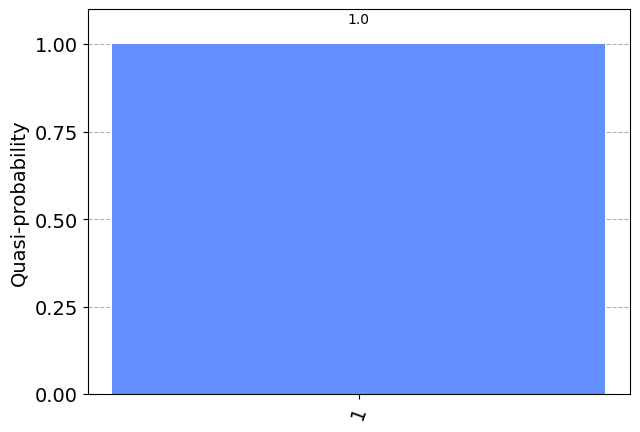

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(1)
qc.initialize([2**-0.5,-(2**-0.5)],0)
qc.h(0)
qc.measure_all()
show_histogram(qc);

Interesting. The resulting state is $|\psi\rangle = |1\rangle$ This means that if we start with the qubit in the state $|1\rangle$ pass it through an H gate twice we will get back to 1. Let's create another circuit to check our understanding once more. To avoid using a forced initialization, let's create the qubit and pass it through a X gate.

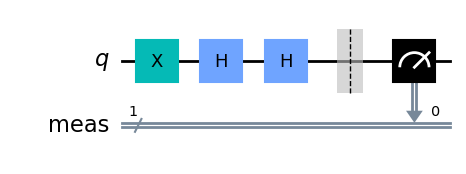

{'1': 1000}


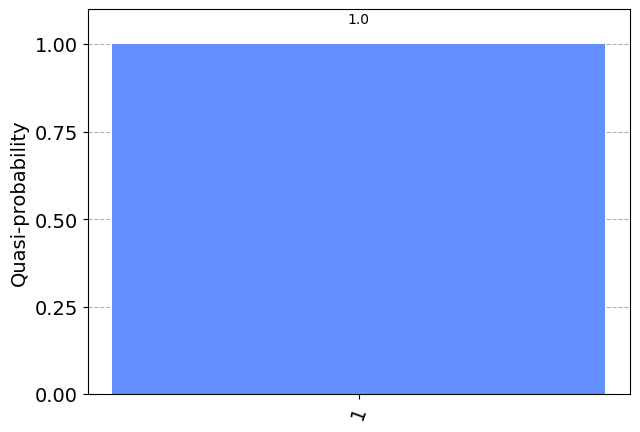

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.h(0)
qc.measure_all()
show_histogram(qc);

As a final step in our understanding, let's check the results using only matrices via `numpy`.

In [ ]:
import numpy as np

# First let's start with the qubit in the state |psi> = (|0> - |1>)/sqrt(2)
psi = np.array([[1,-1]]).T/(2**0.5); psi

array([[ 0.707],
       [-0.707]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5; H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# Now let's pass the qubit Psi through an Hadamard gate.
# The result is a qubit in the state |1>
H.dot(psi)

array([[0.],
       [1.]])

In [ ]:
# Let's start with a qubit in the state |1>, pass it through a
#  a hadamard gate twice and check the result
v0 = np.array([[0,1]]).T; v0

array([[0],
       [1]])

In [ ]:
H.dot(H).dot(v0)

array([[-0.],
       [ 1.]])

In [ ]:
# This means that if we multiply the H gate by itself the result
#  will be an Identity matrix. Let's check it.
H.dot(H)

array([[ 1., -0.],
       [-0.,  1.]])

##### **Ex.5: Start with two qubits, each one in the state $|0\rangle$ and measure the results. Check the answer through matrices operations**

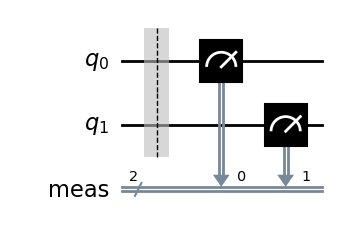

{'00': 1000}


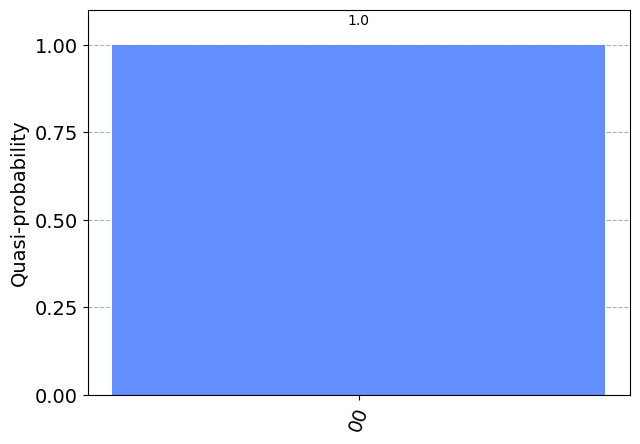

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(2)
qc.measure_all()
show_histogram(qc);

Notice that the result now is the state $|00\rangle$. This means that the two qubits are in a composite state. The representation of this state is: $|\psi\rangle = a|00\rangle + b|00\rangle + c|00\rangle + d|00\rangle$ where $\left.\vert a \right.\vert^2+\left.\vert b \right.\vert^2+\left.\vert c \right.\vert^2+\left.\vert d \right.\vert^2=1$. Let's check this using matrices.

The first qubit can be represented by $|\psi_1\rangle = a_1|0\rangle + b_1|1\rangle$. The second qubit by: $|\psi_2\rangle = a_2|0\rangle + b_2|1\rangle$. The resulting qubit in the circuit input will be the result of an operation called *tensor product*.

This operation will be executed with the qubits $|\psi_1\rangle$ and $|\psi_2\rangle$. It is represented by: $|\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle$.

The algebra behind this operation is this:

$$|\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle$$

$$ = (a_1|0\rangle+b_1|1\rangle) \otimes (a_2|0\rangle+b_2|1\rangle)$$

$$ = a_1a_2|0\rangle|0\rangle + a_1b_2|0\rangle|1\rangle + b_1a_2|1\rangle|0\rangle + b_1b_2|1\rangle|1\rangle$$

$$ = a_1a_2|00\rangle + a_1b_2|01\rangle + b_1a_2|10\rangle + b_1b_2|11\rangle$$

From a matrix standpoint the operation is done like below:

$$ |\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle = \begin{bmatrix} a_1 \\ b_1 \end{bmatrix} \otimes \begin{bmatrix} a_2 \\ b_2 \end{bmatrix} =  \begin{bmatrix} a_1a_2 \\ a_1b_2 \\ b_1a_2 \\ b_1a_2 \end{bmatrix}  $$

Using the numbers in this example we get:

$$|\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle$$

$$ = (1|0\rangle+0|1\rangle) \otimes (1|0\rangle+0|1\rangle)$$

$$ = 1|0\rangle|0\rangle + 0|0\rangle|1\rangle + 0|1\rangle|0\rangle + 0|1\rangle|1\rangle$$

$$ = 1|00\rangle + 0|01\rangle + 0|10\rangle + 0|11\rangle$$

And the equivalent matrix operation is:

$$ |\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix} =  \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}  $$

From the two operations above (algebraic and matrix) we can see that:

$$1|00\rangle + 0|01\rangle + 0|10\rangle + 0|11\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

Lastly, let's check these results with Python

In [ ]:
import numpy as np
psi1 = np.array([[1,0]]).T; psi1

array([[1],
       [0]])

In [ ]:
psi2 = np.array([[1,0]]).T; psi2

array([[1],
       [0]])

In [ ]:
# In numpy the tensor product is calculated with the function kron
np.kron(psi1,psi2)

array([[1],
       [0],
       [0],
       [0]])

##### **Ex.6: Suppose $|+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$. Start two qubits in the state $|+\rangle$, measure the results and check them through matrix operations**

To put a qubit in the state $|+\rangle$ we can either initialize the qubit in it or we can initialize the qubit in the state $|0\rangle$ and pass it through a Hadamard gate. Let's use this second procedure from now on.

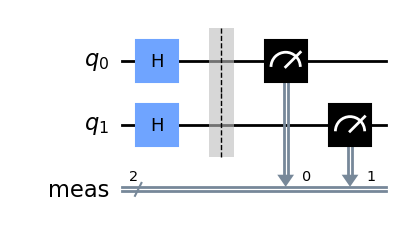

{'01': 240, '11': 252, '00': 232, '10': 276}


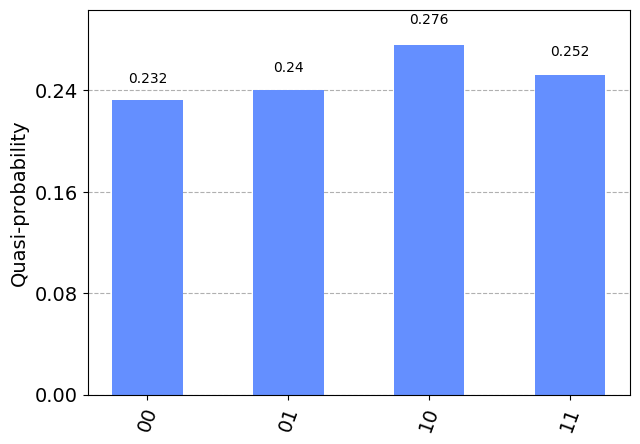

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.measure_all()
show_histogram(qc);

It seems the resulting state is $|\psi\rangle = \frac{1}{2}|00\rangle + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle$. This happens because each state appears in the result 25% ($\frac{1}{4}$) of the time. Since the probability is equal to the state coeficient squared, $a=b=c=d=\frac{1}{2}$ and $|a|^2 = |b|^2 = |c|^2 = |d|^2 = \frac{1}{4}$. Let's confirm this idea through matrix operations.

In [ ]:
import numpy as np
psi1 = np.array([[1,0]]).T;psi1

array([[1],
       [0]])

In [ ]:
psi2 = np.array([[1,0]]).T;psi2

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# When we want to combine two vector states or gate matrices we tensor product them.
psi3 = np.kron(psi1,psi2);psi3

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
H2 = np.kron(H,H);H2

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [ ]:
# When we want to pass a vetor through a gate we calculate the dot product
#  of the total gate matrix with the total vector.
# As we have predicted, the resulting vector state has a=b=c=d=1/2
psi4 = H2.dot(psi3); psi4

array([[0.5],
       [0.5],
       [0.5],
       [0.5]])

##### **Ex.7: Suppose $|-\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$. Start two qubits in the state $|-\rangle$, measure the results and check them through matrix operations**

To put a qubit in the state $|-\rangle$ we can either initialize the qubit in it or we can initialize the qubit in the state $|1\rangle$ and pass it through a Hadamard gate. Let's use this second procedure from now on.

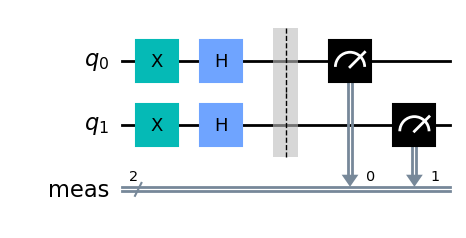

{'11': 239, '00': 250, '10': 267, '01': 244}


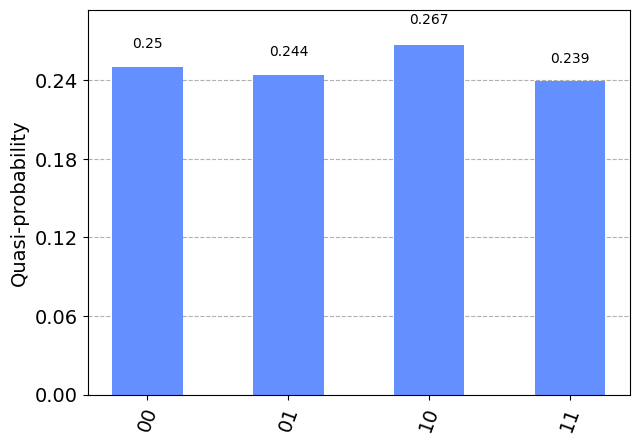

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(2)
qc.x([0,1])
qc.h(0)
qc.h(1)
qc.measure_all()
show_histogram(qc);

It seems the resulting state is similar to the one from the previous exercise. But remember that our probabilites are in fact $|a|^2 = |b|^2 = |c|^2 = |d|^2 = \frac{1}{4}$. We want to know $a, b, c$ and $d$. Since $|a|^2 = 1$, $a$ can be either $+1$ or $-1$. The same happens for $b,c$ and $d$. Let's see if we can predict the exact values of $a, b, c$ and $d$ through matrix operations.

In [ ]:
import numpy as np
psi1 = np.array([[0,1]]).T;psi1

array([[0],
       [1]])

In [ ]:
psi2 = np.array([[0,1]]).T;psi2

array([[0],
       [1]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# When we want to combine two vector states or gate matrices we tensor product them.
psi3 = np.kron(psi1,psi2);psi3

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
H2 = np.kron(H,H);H2

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [ ]:
# When we want to pass a vetor through a gate we calculate the dot product
#  of the total gate matrix with the total vector.
# As we have predicted, the resulting vector state has a=b=c=d=1/2
psi4 = H2.dot(psi3); psi4

array([[ 0.5],
       [-0.5],
       [-0.5],
       [ 0.5]])

From the calculations done above we can see that the resulting state in this example is: $|\psi_4\rangle = \frac{1}{2}|00\rangle - \frac{1}{2}|01\rangle - \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle$

##### **The CNOT gate**

The CNOT (Controle Not) is the most important two qubits gate. If the control bit (the first from the left) is 0, the slave bit (the second from the left) remains the same. If the control bit is 1 the slave bit is switched from 0 to 1 and vice-versa. Therefore $C|00\rangle = |00\rangle$, $C|01\rangle = |01\rangle$, $C|10\rangle = |11\rangle$ and $C|11\rangle = |10\rangle$.

Let's check these operations first with quantum circuits and confirm each one with matrices. We start checking $C|00\rangle = |00\rangle$.

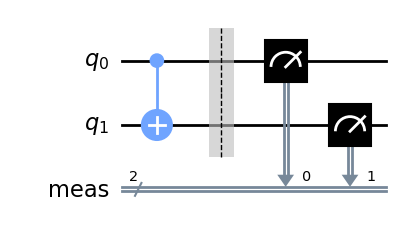

{'00': 1000}


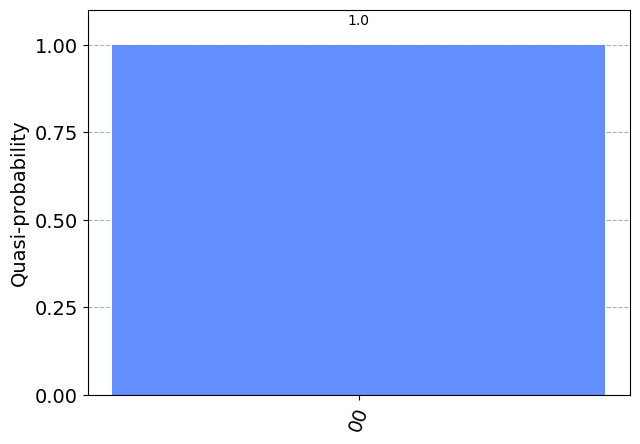

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(2)
qc.cx(0,1)
qc.measure_all()
show_histogram(qc);

The CNOT gate can be described by the matrix $C = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}  $. Let's define this matrix in `numpy` and use it to check the results from the quantum circuit measurements.

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v00 = np.array([[1,0,0,0]]).T;v00

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
# C.v00 = v00
C.dot(v00)

array([[1],
       [0],
       [0],
       [0]])

Now $C|01\rangle = |01\rangle$.

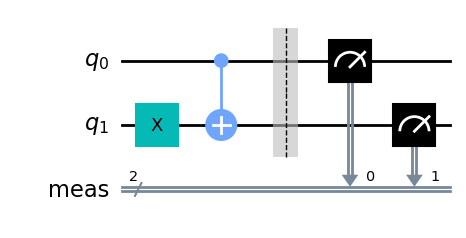

{'10': 1000}


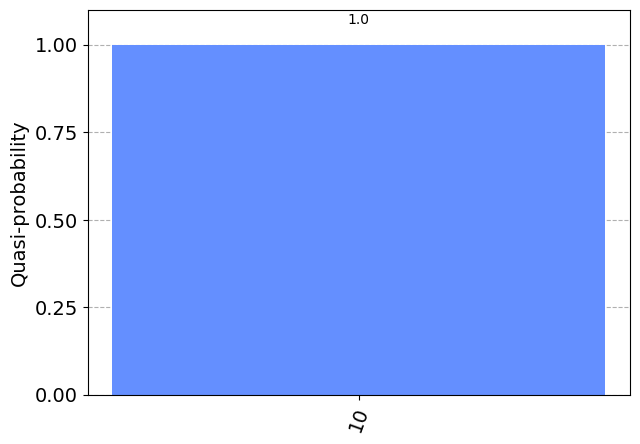

[{'10': 1000}, <Figure size 700x500 with 1 Axes>]

In [ ]:
# Please notice that Qiskit's qubits presentation order is reversed.
#  Therefore 10 in the histogram's x axis should be read as 01 (from
#  inside out or right to left). This makes sense when pairing a
#  a circuit with an histogram

import qiskit as qk
qc = qk.QuantumCircuit(2)
qc.x(1)
qc.cx(0,1)
qc.measure_all()
show_histogram(qc)

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v01 = np.array([[0,1,0,0]]).T;v01

array([[0],
       [1],
       [0],
       [0]])

In [ ]:
# C.v01 = v01
C.dot(v01)

array([[0],
       [1],
       [0],
       [0]])

Now $C|10\rangle = |11\rangle$.

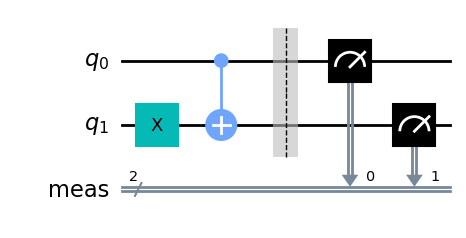

{'10': 1000}


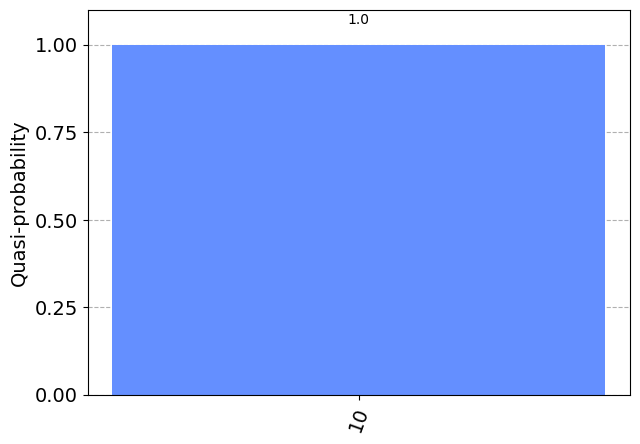

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(2)
qc.x(1)
qc.cx(0,1)
qc.measure_all()
show_histogram(qc);

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v10 = np.array([[0,0,1,0]]).T; v10

array([[0],
       [0],
       [1],
       [0]])

In [ ]:
# C.v10 = v11
C.dot(v10)

array([[0],
       [0],
       [0],
       [1]])

And finally $C|11\rangle = |10\rangle$.

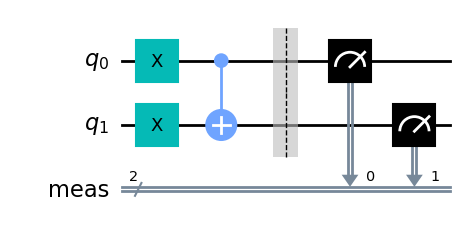

{'01': 1000}


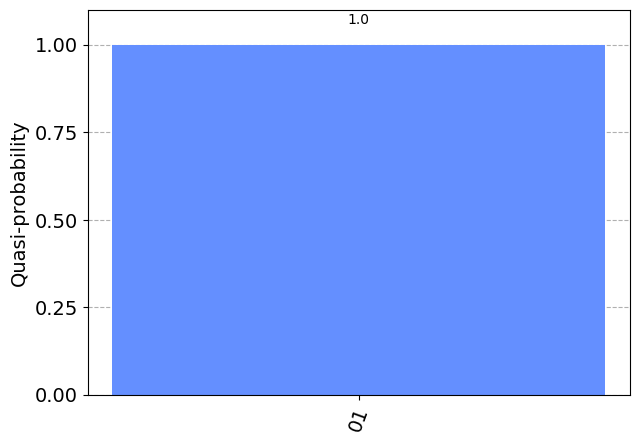

In [ ]:
# Again remember to read qiskit qubits state presentation order
#  from right to left. Therefore 01 in the x axis is in fact 10

import qiskit as qk
qc = qk.QuantumCircuit(2)
qc.x([0,1])
qc.cx(0,1)
qc.measure_all()
show_histogram(qc);

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v11 = np.array([[0,0,0,1]]).T; v11

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
# C.v11 = v10
C.dot(v11)

array([[0],
       [0],
       [1],
       [0]])

##### **Ex.8: Entangled states. Put the first qubit in the $|+\rangle$ state and the second qubit in the $|0\rangle$ state. Passe them through a CNOT gate with the first qubit as control. Measure the results with a quantum circuit and confirm your measurements with matrix operations.**

Our circuit will be composed of two Qubits, which will be initialized in the $|{0}\rangle$ state. The first Qubit will pass through a Hadamart gate (placing it in superposition of the states $|{0}\rangle$ and $|{1}\rangle$. Then a CNOT gate is applied to the set, which will place them in entanglement and superposition, in the states $|{00}\rangle$ and $|{11}\rangle$. Finally, we measure the state of both Qubits.

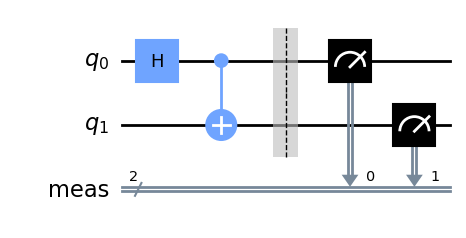

{'11': 520, '00': 480}


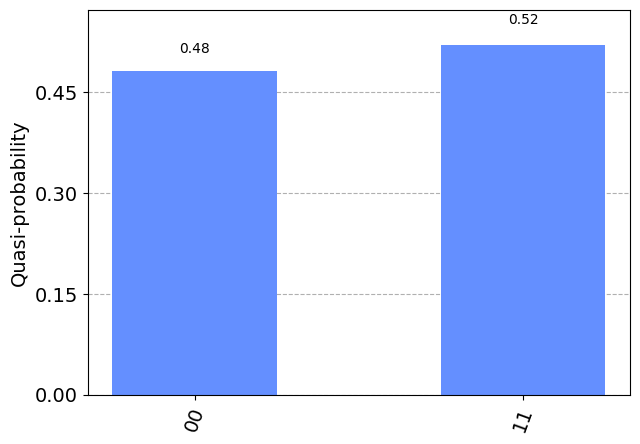

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
show_histogram(qc);

Based on the measurements histogram above, it seems the resulting state is $|\psi\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$.  Let's confirm this result with matrix calculations.

In [ ]:
import numpy as np
va = np.array([[1,0]]).T; va

array([[1],
       [0]])

In [ ]:
vb = np.array([[1,0]]).T; vb

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
vaH = H.dot(va); vaH

array([[0.707],
       [0.707]])

In [ ]:
vaHvb = np.kron(vaH,vb); vaHvb

array([[0.707],
       [0.   ],
       [0.707],
       [0.   ]])

In [ ]:
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
vout = C.dot(vaHvb); vout

array([[0.707],
       [0.   ],
       [0.   ],
       [0.707]])

##### **Ex.9: Entangled states. Put the first qubit in the $|-\rangle$ state and the second qubit in the $|0\rangle$ state. Passe them through a CNOT gate with the first qubit as control. Measure the results with a quantum circuit and confirm your measurements with matrix operations.**

Our circuit is made of two qubits. The first is initialized in the state $|1\rangle$ and the second in the state $|0\rangle$. The first qubit goes through a Hadamard gate (putting it in the superposition of $|0\rangle$ and $|1\rangle$. After that the two qubits go through a CNOT gate. The first qubit as control and the second as slave. The resulting state is a superposition of  $|00\rangle$ and $|11\rangle$. The circuit ends with a measure of the qubits.

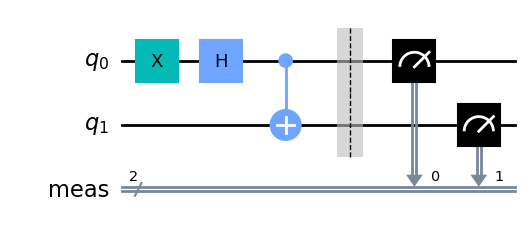

{'11': 504, '00': 496}


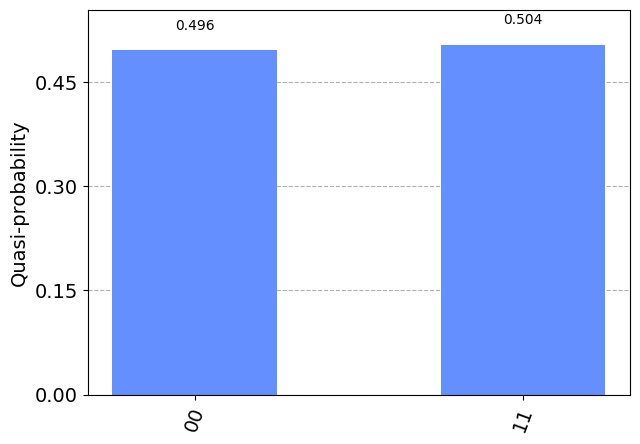

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
show_histogram(qc);

Based on the measurements histogram above, it seems the resulting state is similar to the previous one. Since the control qubit was initialized in the state $|1\rangle$ the result should not be exactly equal. An option is $|1\rangle$ $|\psi\rangle = \frac{1}{\sqrt{2}}|00\rangle - \frac{1}{\sqrt{2}}|11\rangle$.  Let's confirm this result with matrix operations.

In [ ]:
import numpy as np
va = np.array([[0,1]]).T; va

array([[0],
       [1]])

In [ ]:
vb = np.array([[1,0]]).T; vb

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
vaH = H.dot(va); vaH

array([[ 0.707],
       [-0.707]])

In [ ]:
vaHvb = np.kron(vaH,vb); vaHvb

array([[ 0.707],
       [ 0.   ],
       [-0.707],
       [-0.   ]])

In [ ]:
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
vout = C.dot(vaHvb); vout

array([[ 0.707],
       [ 0.   ],
       [ 0.   ],
       [-0.707]])

##### **Ex.10: Create, execute, simulate and present the counting result of a quantum circuit with three qubits in only one cell. Insert the measurement gates using a for loop.**

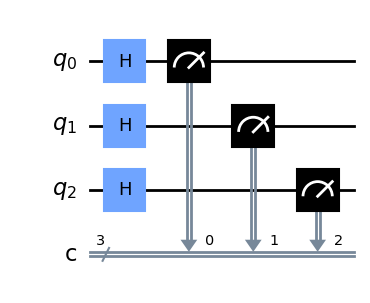

{'100': 122, '101': 131, '001': 127, '110': 124, '011': 117, '111': 117, '000': 134, '010': 128}


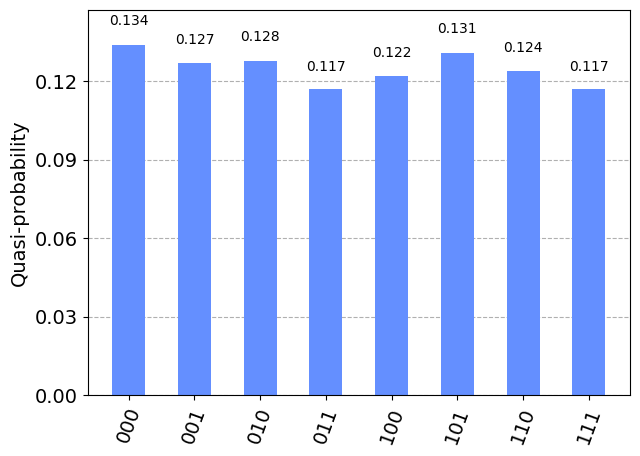

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(3,3)
for i in range(3):
  qc.h(i)
  qc.measure(i,i)
show_histogram(qc);

##### **Ex.11: Create, execute, simulate and present the counting result of a quantum circuit with four qubits in only one cell. Insert the measurement gates using a python list.**

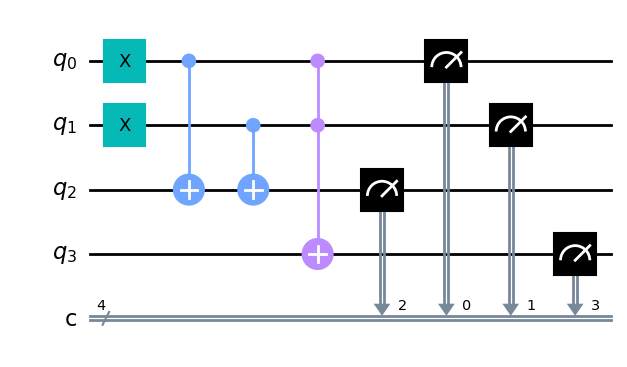

{'1011': 1000}


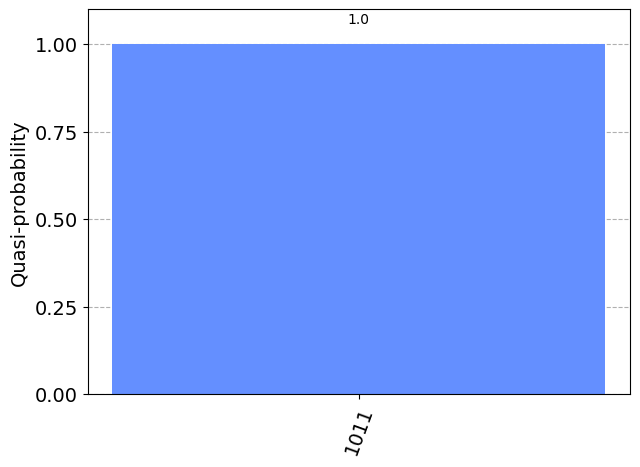

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(4,4)
qc.x([0,1])
qc.cx([0,1],[2,2])
qc.ccx(0,1,3)
qc.measure([0,1,2,3],[0,1,2,3])
show_histogram(qc);

##### **Ex.12:Create a circuit with one qubit, one bit, a NOT gate and a measure. Present the qubit state vector, the circuit transformation matrix before measurement and the histogram of 10.000 measurements.**

Histogram and Countings

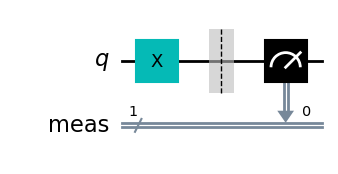

{'1': 1000}


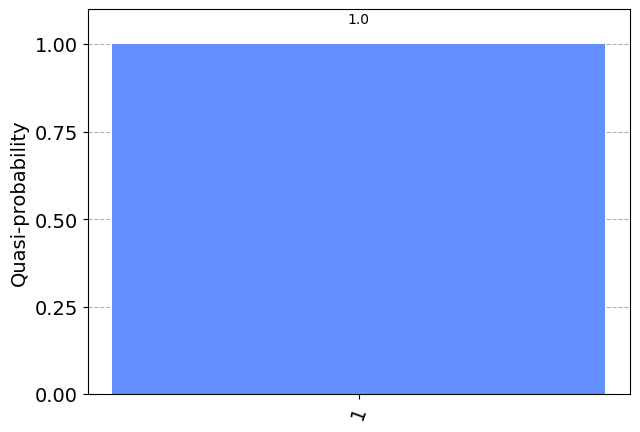

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(1)
qc.x(0)
qc.measure_all()
show_histogram(qc);

State Vector - To generate the state vector, we must eliminate all measurements up to the point we want it.

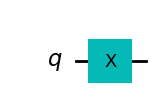

In [ ]:
# To avoid modifying the original circuit, let's first copy it
qc2 = qc.copy()
qc2.remove_final_measurements()
qc2.draw('mpl', style='clifford', scale=1)

In [ ]:
import qiskit as qk
sv = qk.quantum_info.Statevector(qc2); sv

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


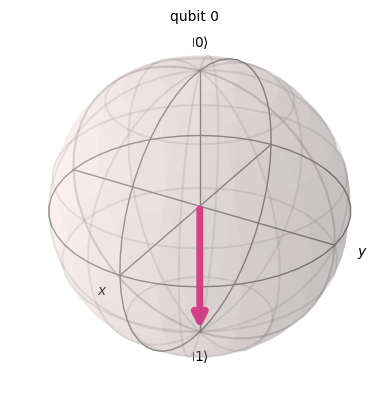

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(sv)

Unitary Matrix - Please note that initializing the qubits with the method `initialize` will generate an error.

In [ ]:
from qiskit.quantum_info import Operator
Operator(qc2).data

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])